Value at risk is the maximum loss possible with a given level of confidence over a predetermined time frame. This post will specifically cover historical VaR, or nonparametric method . I want to measure would be the change in market prices over a time period (e.g. day to day). So what VAR would then tell us then would be how much we could lose (or gain) due to the change in prices.

It's quite common to use lognormal instead of normal returns when computing the change in prices. 

https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Above will help you to understand a bit. 

I will compute relative returns and lognormal returns for FX and equity prices. As daily returns are not large, the difference for FX is close to indiscernible, and just slightly for equity returns.

I will use FX for fx log return and equity data for historical var of confidence 99%, 99.99% and 95% 
These data are freely available from Quandl.


In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import quandl

In [3]:
fx_list = ['CUR/JPY', 'CUR/GBP', 
           'CUR/EUR', 'CUR/CHF', 'CUR/INR']

In [4]:
quandl.ApiConfig.api_key = "AXbpQh8Zskj3-waCyyt2"

In [5]:
start = pd.datetime(2008,1,1)

In [6]:
end = pd.datetime(2019,1,1)

In [7]:
dates = pd.date_range(start, end)

In [8]:
#mydata = quandl.get("CUR/INR", start_date=start, end_date=end)
#print(mydata)

In [9]:
FX_DF = pd.DataFrame(index=dates)
for code in fx_list:
    FX_DF[code] = quandl.get(code, start_date=start, end_date=end)

In [10]:
FX_DF.head()

,CUR/JPY,CUR/GBP,CUR/EUR,CUR/CHF,CUR/INR
2008-01-01,111.743254,0.502673,0.683796,1.131935,39.346065
2008-01-02,110.289155,0.504766,0.679246,1.120603,39.345911
2008-01-03,109.233223,0.505934,0.678273,1.112749,39.288483
2008-01-04,108.726495,0.506371,0.677078,1.108928,39.200962
2008-01-05,108.838030,0.506420,0.677963,1.109804,39.210679


In [11]:
print(FX_DF.iloc[[0]])
print(FX_DF.head(10))
print(FX_DF.shift(1).head(10))
print(FX_DF.columns)
print(FX_DF.index)
# NUmber of days
print(len(FX_DF))

               CUR/JPY   CUR/GBP   CUR/EUR   CUR/CHF    CUR/INR
2008-01-01  111.743254  0.502673  0.683796  1.131935  39.346065
               CUR/JPY   CUR/GBP   CUR/EUR   CUR/CHF    CUR/INR
2008-01-01  111.743254  0.502673  0.683796  1.131935  39.346065
2008-01-02  110.289155  0.504766  0.679246  1.120603  39.345911
2008-01-03  109.233223  0.505934  0.678273  1.112749  39.288483
2008-01-04  108.726495  0.506371  0.677078  1.108928  39.200962
2008-01-05  108.838030  0.506420  0.677963  1.109804  39.210679
2008-01-06  108.838030  0.506420  0.677963  1.109804  39.210679
2008-01-07  109.076555  0.507252  0.680426  1.115512  39.181921
2008-01-08  109.413784  0.506782  0.679785  1.115252  39.146716
2008-01-09  109.528893  0.510533  0.681782  1.114967  39.151282
2008-01-10  109.640964  0.510704  0.677844  1.107778  39.206950
               CUR/JPY   CUR/GBP   CUR/EUR   CUR/CHF    CUR/INR
2008-01-01         NaN       NaN       NaN       NaN        NaN
2008-01-02  111.743254  0.502673  0.6837

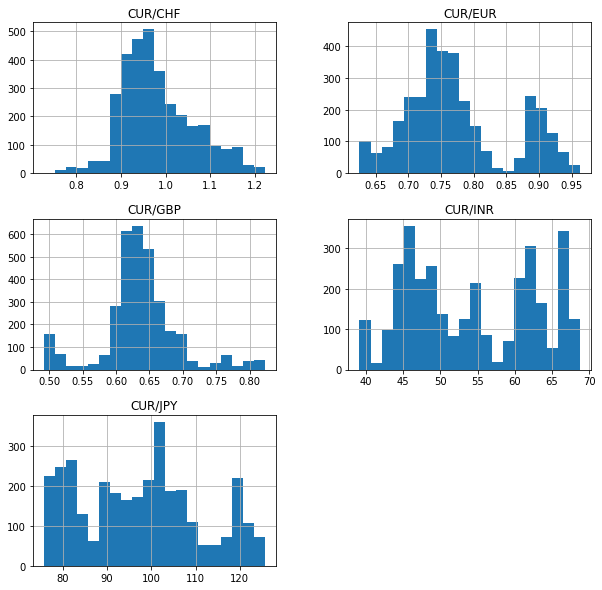

In [12]:
FX_DF.hist(bins=20, figsize=(10,10))
plt.show()

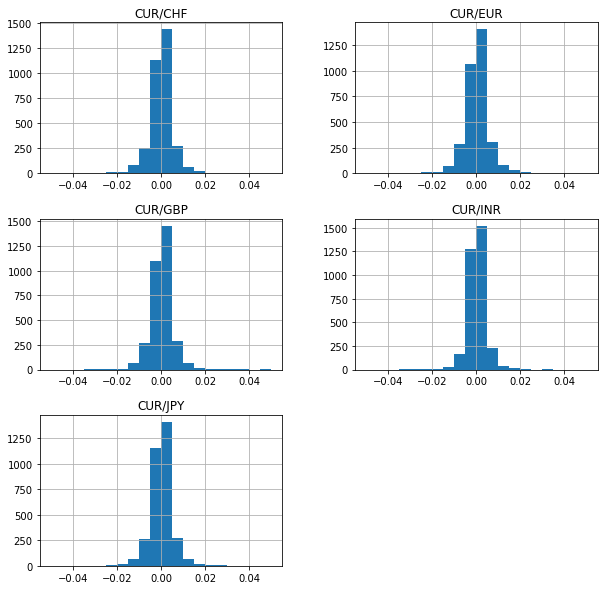

In [13]:
FX_Returns = (FX_DF/FX_DF.shift(1))-1
FX_Returns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

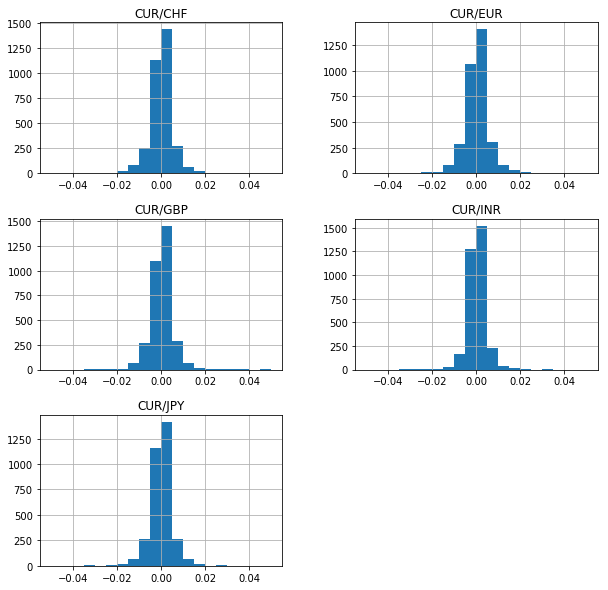

In [14]:
FX_DF_LogReturns = np.log(FX_DF/FX_DF.shift(1))
FX_DF_LogReturns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

In [15]:
eq_list = ['EOD/MSFT', 'EOD/AAPL', 'EOD/MMM', 'EOD/MCD']
EQ_DF = pd.DataFrame(index=dates)
for code in eq_list:
    EQ_DF[code] = quandl.get(code, start_date=start, end_date=end).Close

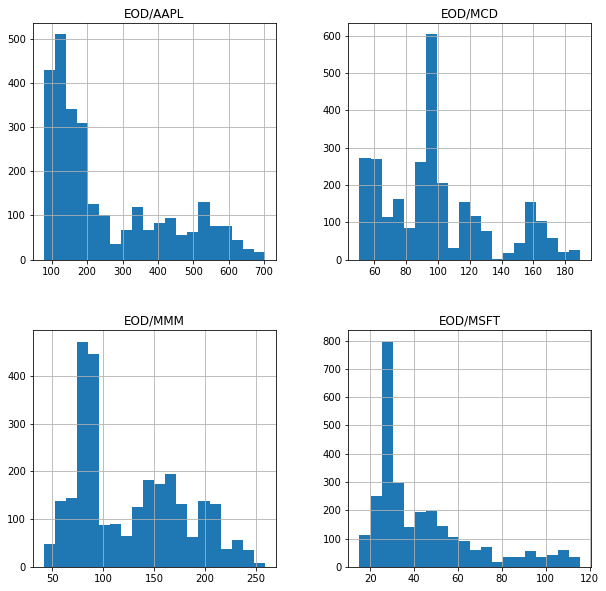

In [16]:
EQ_DF.hist(bins=20, figsize=(10,10))
plt.show()

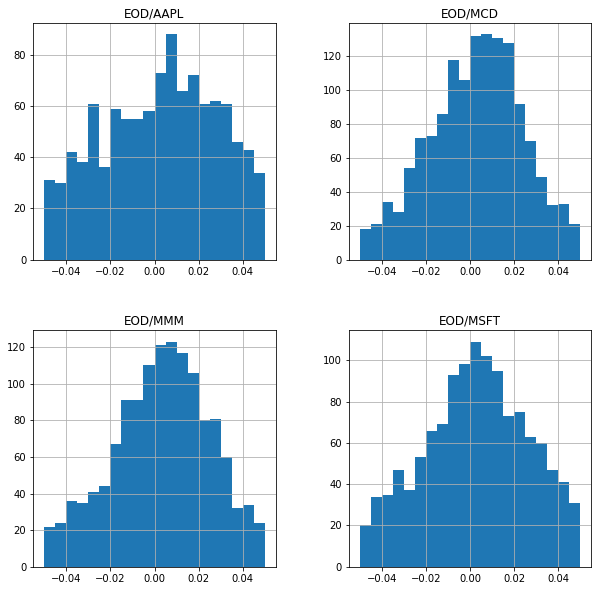

In [17]:
EQ_Returns = (EQ_DF/EQ_DF.shift(10))-1
EQ_Returns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

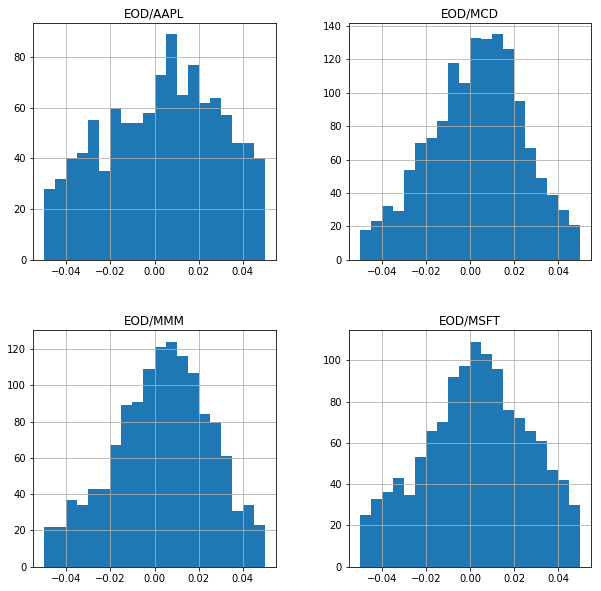

In [18]:
EQ_DF_LogReturns = np.log(EQ_DF/EQ_DF.shift(10))
EQ_DF_LogReturns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

Historical VAR

In [19]:
print(EQ_DF.dropna().iloc[-1,:]*np.percentile(EQ_Returns.dropna(), 1)) # 99% confidence intervals

EOD/MSFT   -11.322060
EOD/AAPL   -17.583359
EOD/MMM    -21.239591
EOD/MCD    -19.793819
Name: 2018-12-31 00:00:00, dtype: float64


In [20]:
print(EQ_DF.dropna().iloc[-1,:]*np.percentile(EQ_Returns.dropna(), 0.01)) # 99.99% confidence intervals

EOD/MSFT    -87.041433
EOD/AAPL   -135.176879
EOD/MMM    -163.285169
EOD/MCD    -152.170397
Name: 2018-12-31 00:00:00, dtype: float64


In [21]:
print(EQ_DF.dropna().iloc[-1,:]*np.percentile(EQ_Returns.dropna(), 5)) # 95% confidence intervals

EOD/MSFT    -6.463438
EOD/AAPL   -10.037832
EOD/MMM    -12.125070
EOD/MCD    -11.299720
Name: 2018-12-31 00:00:00, dtype: float64
